In [17]:
import numpy as np
from numpy.linalg import inv
import cv2
import matplotlib.pyplot as plt

In [18]:
# 定义源图片和目标图片的四个对应点
src_points = np.array([[587, 364], [67, 739], [476, 1347], [1204, 721]], dtype=np.float32)
dst_points = np.array([[807, 764], [405, 764], [509, 1315], [1006, 1227]], dtype=np.float32)

# 构造矩阵 A 和 b
A = []
for i in range(len(src_points)):
    x, y = src_points[i]
    u, v = dst_points[i]
    A.append([x, y, 1, 0, 0, 0, -u*x, -u*y])
    A.append([0, 0, 0, x, y, 1, -v*x, -v*y])
A = np.array(A)

b = []
for i in range(len(dst_points)):
    x, y = dst_points[i]
    b.append(x)
    b.append(y)
b = np.array(b)

# 通过矩阵运算求解 H 矩阵
H = np.dot(inv(np.dot(A.T, A)), np.dot(A.T, b))
H = np.append(H, 1).reshape(3, 3)

print(H)

[[ 8.21971539e-01 -2.05166306e-01  5.52540413e+02]
 [ 7.53584662e-01  9.14334754e-01  1.34013676e+02]
 [ 2.31073613e-04  1.49432578e-04  1.00000000e+00]]


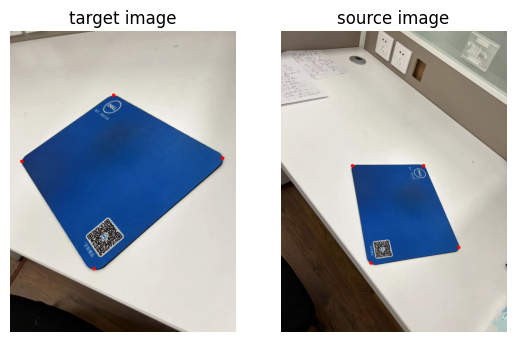

In [19]:
# 对源图片进行单应性变换
dst = cv2.imread('image1.jpg')
src = cv2.imread('image2.jpg')

# 在图片上标记点
point = (318, 256)                   # 要标记的点的坐标
radius = 10                          # 圆的半径
color = (0, 0, 255)                  # 红色
thickness = -1                       # 线条宽度
for src_point in src_points:
    cv2.circle(src, tuple(src_point.astype('int')), radius, color, thickness)

for dst_point in dst_points:
    cv2.circle(dst, tuple(dst_point.astype('int')), radius, color, thickness)


# 创建子图，显示第一张图片
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('target image')

# 创建子图，显示第二张图片
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('source image')

# 显示图片
plt.show()

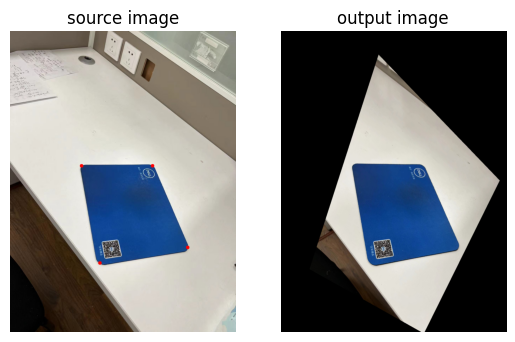

In [20]:
src = cv2.imread('image2.jpg')
height, width, _ = src.shape
warped_src = np.zeros((height, width, 3))

# 对每一个点图像进行变换，生成变换后的图片
for y in range(height):
    for x in range(width):
        pt = np.dot(H, np.array([x, y, 1]))
        u = int(round(pt[0] / pt[2]))
        v = int(round(pt[1] / pt[2]))
        if u >= 0 and u < width and v >= 0 and v < height:
            warped_src[v, u] = src[y, x]

out = warped_src.astype(np.uint8)

# 创建子图，显示第一张图片
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('source image')

# 创建子图，显示第二张图片
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(out, cv2.COLOR_BGR2RGB))
plt.axis('off') 
plt.title('output image')

# 显示图片
plt.show()